In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import settings

# Topic Selection

I decided to use this project to visually explore the education domain and in part answer the follwing question.
**How has the level of education changed in different countries?**

# Discover

First, a search for sutable datasets was performed. The topic of education is of interest to many. Thus, a large number of sutable datasets was discovered from various sources including the following platforms.

- Kaggle
- The World Bank
- OECD Open Data
- Our World in Data

Many datasets consider a handful of education indicators for a varying number of countries. The most extensive and global dataset discovered is the one provided by the World Bank which we will explore briefly.

## The World Bank Education Dataset

In [54]:
df = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'API_4_DS2_en_csv_v2_3160069.csv', skiprows=4)
df = df.drop(columns=['Unnamed: 65'])

In [55]:
df.shape

(43092, 65)

In [57]:
num_country = df['Country Name'].unique().size
print(f'There are {num_country} countries in the dataset.')

There are 266 countries in the dataset.


In [14]:
num_indicator = df['Indicator Code'].unique().size
print(f'There are {num_indicator} indicators in the dataset.')

There are 162 indicators in the dataset.


In [16]:
year_min = df.columns[4]
year_max = df.columns[-1]
print(f'The dataset holds data from the year {year_min} to the year {year_max}.')

The dataset holds data from the year 1960 to the year 2020.


Most of the indicators are provided separately form female and male which allows a distinction by gender. Further, the matadata includes an income group for each country.

Some of the features are the following.

In [53]:
meta = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'Metadata_Indicator_API_4_DS2_en_csv_v2_3160069.csv', index_col='INDICATOR_CODE')
indicators = ['SP.POP.1564.TO.ZS', 'SE.XPD.CPRM.ZS', 'SE.XPD.TOTL.GD.ZS', 'SE.TER.CUAT.BA.FE.ZS', 'SE.SEC.TCAQ.LO.ZS', 'SE.TER.CUAT.ST.MA.ZS', 'SE.ADT.1524.LT.FM.ZS']
for indicator in meta.loc[indicators]['INDICATOR_NAME']:
    print(indicator)

Population ages 15-64 (% of total population)
Current education expenditure, primary (% of total expenditure in primary public institutions)
Government expenditure on education, total (% of GDP)
Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)
Trained teachers in lower secondary education (% of total teachers)
Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)
Literacy rate, youth (ages 15-24), gender parity index (GPI)


One of the main challenges in this project will be the amount of missing data which we can observe in the following heatmap where the dark spots show the missing data.

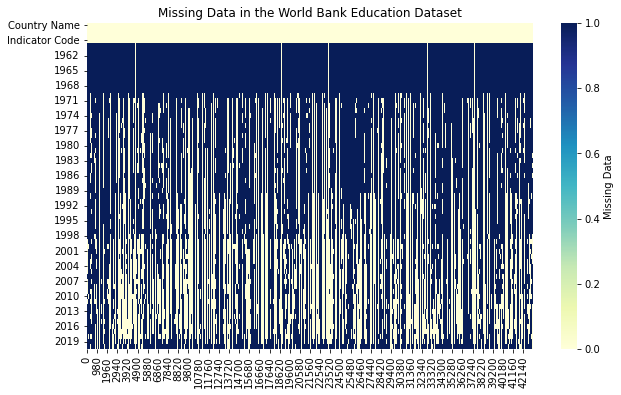

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T,
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data in the World Bank Education Dataset')
plt.show()

In the next step of the project "Wrangle & Profile" we will explore the data in more detail and based on this decide which indicators to visualize based on which of them are present for most countries and years.
The goal ist to visualize the differences in education between different countries and the change over several years. A further focus will be to show the differences between male and female in the education domain.